# Predicting Heart Disease Risk

# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Utils

## Data type seggregator

In [10]:
def type_splitter(df, type_):
    return list(df.select_dtypes(include=[type_]).columns)

## Custom Transformers

In [2]:
def log(data):
    return np.log(data)

def log1p(data):
    return np.log1p(data)

# Reading the data

In [5]:
df = pd.read_csv('data/CVD_cleaned.csv')

# Checking the data types 

*What's being done here?*
>The analysis will be done by splitting the database to different databases of similar datatypes and then analysing each of them.

*Why?*
>*The analysis here is made with an assumption that different datatypes should be analysed using different methods.*

>*This could help in building a uniformity in the analysis process and then later make a way to build a general process for the analysis*

>*This could give rise to ideas for different multivariate analysis*

In [9]:
data_types = list(df.dtypes.astype(str).unique())
print(f"Dataframe has columns of type {', '.join(data_types)}.")

Dataframe has columns of type object, float64.


# Analysing data based on type

## Analysing categorical datasets

In [11]:
categorical_ = type_splitter(df, 'object')
df[categorical_].describe().iloc[[1]].T

,unique
General_Health,5
Checkup,5
Exercise,2
Heart_Disease,2
Skin_Cancer,2
Other_Cancer,2
Depression,2
Diabetes,4
Arthritis,2
Sex,2


In [12]:
for col in df[categorical_].columns:
    print(col)
    print("===============================================================================")
    percs = df[categorical_][col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    print(pd.concat([df[col].value_counts(),percs], axis=1, keys=['count', 'percentage']))
    print("===============================================================================\n")

General_Health
                 count percentage
General_Health                   
Very Good       110395      35.7%
Good             95364      30.9%
Excellent        55954      18.1%
Fair             35810      11.6%
Poor             11331       3.7%

Checkup
                          count percentage
Checkup                                   
Within the past year     239371      77.5%
Within the past 2 years   37213      12.0%
Within the past 5 years   17442       5.6%
5 or more years ago       13421       4.3%
Never                      1407       0.5%

Exercise
           count percentage
Exercise                   
Yes       239381      77.5%
No         69473      22.5%

Heart_Disease
                count percentage
Heart_Disease                   
No             283883      91.9%
Yes             24971       8.1%

Skin_Cancer
              count percentage
Skin_Cancer                   
No           278860      90.3%
Yes           29994       9.7%

Other_Cancer
               co

*On analysing the unique values in categorical attributes it was found that:*
>*Inferences*

>>*Most of the induviduals have good health in general*

>>*Large percentage of induviduals have done a Checkup in the recent years*

>>*Most people didnt have any diseases and did excercise*
>>*The distribution of smokers or non-smokers and male or female is same*

>*To Do*

>>*Some categorical attributes can be transformed to boolean*

>>*Values inside Diabetes attribute got some discrepencies*

>>*Heart Disease Vs Male/Female*

>>*Heart Disease Vs Smokers or non smokers*

>>*Heart disease vs Different other diseases*

>>*Heart disease vs Total diseases*

>>*Total Diseases and general health*

>>*Checkup Vs Heart Disease*

>>*Age vs Heart disease*

>>*Age vs each other disease and all diseases*

### Checking diabetes attribute

In [8]:
df = df.replace({'No, pre-diabetes or borderline diabetes': 'No'})

In [9]:
df[df['Diabetes'].str.contains('Yes, but female told only during pregnancy')].Sex.value_counts()

Female    2640
Male         6
Name: Sex, dtype: int64

In [10]:
df[df['Diabetes'].str.contains('Yes, but female told only during pregnancy') & df.Sex.str.contains('Male')]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
51141,Good,Within the past 2 years,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Male,18-24,173.0,81.65,27.37,No,0.0,12.0,1.0,4.0
88052,Very Good,Within the past year,No,No,No,No,No,"Yes, but female told only during pregnancy",No,Male,25-29,185.0,136.08,39.58,No,0.0,60.0,30.0,30.0
88681,Very Good,Within the past year,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",Yes,Male,35-39,175.0,90.26,29.39,Yes,1.0,8.0,30.0,8.0
89362,Very Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",Yes,Male,75-79,185.0,135.62,39.45,No,1.0,30.0,0.0,4.0
90960,Very Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Male,50-54,155.0,65.77,27.40,Yes,30.0,20.0,20.0,2.0
131194,Very Good,Within the past 2 years,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Male,18-24,168.0,81.65,29.05,No,2.0,16.0,20.0,8.0


Assuming the value in diabetes 'Yes, but female told only during pregnancy' should have only represented female population, above can be considered as a discrepency. This can be imputed or removed from the record in a later stage

We can convert 'No, pre-diabetes or borderline diabetes' to No.

our target variable here is Heart_Disease

Analysing other attributes based on Heart_Disease

In [11]:
df.drop(df[df['Diabetes'].str.contains('Yes, but female told only during pregnancy') & df['Sex'].str.contains('Male')].index, inplace =True)
df = df.replace({'Yes, but female told only during pregnancy': 'Yes'})

In [12]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Renaming Values in Checkup

In [13]:
df = df.replace({'Within the past year':'0-1',
                                     'Within the past 2 years':'0-2',
                                     'Within the past 5 years': '0-5',
                                     '5 or more years ago':'5+',
                                     'Never': '0'})

### Regrouping Values in Age_Group

In [14]:
# df['Age_Group'] = np.where(df['Age_Category'].isin([['18-24','25-29','30-34','35-39'],
#                                                    ['40-44','45-49','50-54','55-59'],
#                                                    ['60-64','65-69','70-74','75-79','80+']]),
#                            [['Young'], ['Middle Age'], ['Old']],
#                            'Other')

In [15]:
df['Age_Group'] = np.where(df['Age_Category'].isin(['18-24','25-29','30-34','35-39']), 
                           'Young',
                           None)

df['Age_Group'] = np.where(df['Age_Category'].isin(['40-44','45-49','50-54','55-59']), 
                           'Middle Aged',
                           df['Age_Group'])

df['Age_Group'] = np.where(df['Age_Category'].isin(['60-64','65-69','70-74','75-79','80+']), 
                           'Old',
                           df['Age_Group'])
categorical_.append('Age_Group')

In [16]:
for col in df[categorical_].columns:
    print(col)
    print("===============================================================================")
    percs = df[categorical_][col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    print(pd.concat([df[col].value_counts(),percs], axis=1, keys=['count', 'percentage']))
    print("===============================================================================\n")

General_Health
            count percentage
Very Good  110390      35.7%
Good        95363      30.9%
Excellent   55954      18.1%
Fair        35810      11.6%
Poor        11331       3.7%

Checkup
      count percentage
0-1  239367      77.5%
0-2   37211      12.0%
0-5   17442       5.6%
5+    13421       4.3%
0      1407       0.5%

Exercise
      count percentage
Yes  239376      77.5%
No    69472      22.5%

Heart_Disease
      count percentage
No   283877      91.9%
Yes   24971       8.1%

Skin_Cancer
      count percentage
No   278854      90.3%
Yes   29994       9.7%

Other_Cancer
      count percentage
No   278970      90.3%
Yes   29878       9.7%

Depression
      count percentage
No   246948      80.0%
Yes   61900      20.0%

Diabetes
      count percentage
No   266037      86.1%
Yes   42811      13.9%

Arthritis
      count percentage
No   207779      67.3%
Yes  101069      32.7%

Sex
         count percentage
Female  160196      51.9%
Male    148652      48.1%

Age_Category

In [17]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,Poor,0-2,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,Old
1,Very Good,0-1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Old
2,Very Good,0-1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,Old
3,Poor,0-1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Old
4,Good,0-1,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,Old


In [18]:
# sns.set(rc={'figure.figsize': (11.7,8.27)})
# g=sns.catplot(data=categorical_, x='General_Health', kind='count', hue='Heart_Disease',
#               order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
#               row='Age_Category', col='Checkup', sharex=True, sharey=True,
#               row_order=['Young', 'Middle Age', 'Old'],
#               col_order=['0','0-1','0-2','0-5','5+']
#              )

### Splitting object to categorical and boolean

In [19]:
boolean_ = list(set(categorical_) - set(['General_Health', 'Age_Category', 'Checkup', 'Age_Group']))
categorical_ = ['General_Health', 'Age_Category', 'Checkup', 'Age_Group']

In [20]:
for col in df[boolean_].columns:
    print(col)
    print("===============================================================================")
    percs = df[boolean_][col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    print(pd.concat([df[boolean_][col].value_counts(),percs], axis=1, keys=['count', 'percentage']))
    print("===============================================================================\n")

Skin_Cancer
      count percentage
No   278854      90.3%
Yes   29994       9.7%

Depression
      count percentage
No   246948      80.0%
Yes   61900      20.0%

Arthritis
      count percentage
No   207779      67.3%
Yes  101069      32.7%

Sex
         count percentage
Female  160196      51.9%
Male    148652      48.1%

Heart_Disease
      count percentage
No   283877      91.9%
Yes   24971       8.1%

Smoking_History
      count percentage
No   183586      59.4%
Yes  125262      40.6%

Exercise
      count percentage
Yes  239376      77.5%
No    69472      22.5%

Diabetes
      count percentage
No   266037      86.1%
Yes   42811      13.9%

Other_Cancer
      count percentage
No   278970      90.3%
Yes   29878       9.7%



In [21]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Exercise', col='Smoking_History', sharex=True, sharey=True)

In [22]:
# g=sns.catplot(data=df_boolean, x='Skin_Cancer',kind='count', hue='Heart_Disease', row = 'Sex', col='Other_Cancer')

In [23]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Skin_Cancer', col='Depression', sharex=True, sharey=True)

In [24]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Skin_Cancer', col='Arthritis', sharex=True, sharey=True)

In [25]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Other_Cancer', col='Depression', sharex=True, sharey=True)

In [26]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Other_Cancer', col='Smoking_History', sharex=True, sharey=True)

In [27]:
# g=sns.catplot(data=df_boolean, x='Sex', kind='count', hue='Heart_Disease',
#               row='Skin_Cancer', col='Smoking_History', sharex=True, sharey=True)

In [28]:
df = df.replace({
    'Male': True,
    'Female':False})
df = df.replace({
    'Yes': True,
    'No':False})
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,Poor,0-2,False,False,False,False,False,False,True,False,70-74,150.0,32.66,14.54,True,0.0,30.0,16.0,12.0,Old
1,Very Good,0-1,False,True,False,False,False,True,False,False,70-74,165.0,77.11,28.29,False,0.0,30.0,0.0,4.0,Old
2,Very Good,0-1,True,False,False,False,False,True,False,False,60-64,163.0,88.45,33.47,False,4.0,12.0,3.0,16.0,Old
3,Poor,0-1,True,True,False,False,False,True,False,True,75-79,180.0,93.44,28.73,False,0.0,30.0,30.0,8.0,Old
4,Good,0-1,False,False,False,False,False,False,False,True,80+,191.0,88.45,24.37,True,0.0,8.0,4.0,0.0,Old


In [29]:
df[boolean_].head()

,Skin_Cancer,Depression,Arthritis,Sex,Heart_Disease,Smoking_History,Exercise,Diabetes,Other_Cancer
0,False,False,True,False,False,True,False,False,False
1,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,True,True,False
3,False,False,False,True,True,False,True,True,False
4,False,False,False,True,False,True,False,False,False


### Creating a new feature with health conditions excluding heart disease

Diseases captured in the dataset are:

Skin_Cancer

Other_Cancer

Depression

Diabetes

Arthritis

In [30]:
conditions_ = ['Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis']
df['Conditions'] = df[conditions_].sum(axis=1)
integer_ = type_splitter('int64')
df.Conditions.value_counts()

0    136653
1    101836
2     50655
3     16565
4      2884
5       255
Name: Conditions, dtype: int64

In [31]:
df[conditions_].describe().T

,count,unique,top,freq
Skin_Cancer,308848,2,False,278854
Other_Cancer,308848,2,False,278970
Depression,308848,2,False,246948
Diabetes,308848,2,False,266037
Arthritis,308848,2,False,207779


float_ = type_splitter('float64')
df[float_].skew()

In [33]:
df[float_].describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308848.0,170.615193,10.658025,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308848.0,83.588365,21.342975,24.95,68.04,81.65,95.25,293.02
BMI,308848.0,28.626144,6.522327,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308848.0,5.096355,8.199701,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308848.0,29.835307,24.875847,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308848.0,15.110407,14.926284,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308848.0,6.296557,8.582925,0.00,2.00,4.00,8.00,128.00


In [34]:
df.drop(df[df['BMI']>70].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308682.0,170.622395,10.639357,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308682.0,83.526810,21.143439,24.95,68.04,81.65,95.25,249.48
BMI,308682.0,28.599228,6.417821,12.02,24.21,27.44,31.82,69.94
Alcohol_Consumption,308682.0,5.097988,8.200315,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308682.0,29.838219,24.875284,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308682.0,15.111587,14.924694,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308682.0,6.295858,8.581451,0.00,2.00,4.00,8.00,128.00
Conditions,308682.0,0.859934,0.947900,0.00,0.00,1.00,1.00,5.00


In [35]:
df[float_].skew()

Height_(cm)                     0.037061
Weight_(kg)                     0.961120
BMI                             1.187046
Alcohol_Consumption             1.885094
Fruit_Consumption               1.248243
Green_Vegetables_Consumption    2.414990
FriedPotato_Consumption         4.914153
dtype: float64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308682.0,170.622395,10.639357,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308682.0,83.526810,21.143439,24.95,68.04,81.65,95.25,249.48
BMI,308682.0,28.599228,6.417821,12.02,24.21,27.44,31.82,69.94
Alcohol_Consumption,308682.0,5.097988,8.200315,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308682.0,29.838219,24.875284,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308682.0,15.111587,14.924694,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308682.0,6.295858,8.581451,0.00,2.00,4.00,8.00,128.00
Conditions,308682.0,0.859934,0.947900,0.00,0.00,1.00,1.00,5.00


In [37]:
df[float_].skew()

Height_(cm)                     0.037061
Weight_(kg)                     0.961120
BMI                             1.187046
Alcohol_Consumption             1.885094
Fruit_Consumption               1.248243
Green_Vegetables_Consumption    2.414990
FriedPotato_Consumption         4.914153
dtype: float64

In [38]:
df[integer_].skew()

Conditions    0.980952
dtype: float64

In [39]:
df[float_].describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308682.0,170.622395,10.639357,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308682.0,83.526810,21.143439,24.95,68.04,81.65,95.25,249.48
BMI,308682.0,28.599228,6.417821,12.02,24.21,27.44,31.82,69.94
Alcohol_Consumption,308682.0,5.097988,8.200315,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308682.0,29.838219,24.875284,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308682.0,15.111587,14.924694,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308682.0,6.295858,8.581451,0.00,2.00,4.00,8.00,128.00


In [40]:
df[float_].skew()

Height_(cm)                     0.037061
Weight_(kg)                     0.961120
BMI                             1.187046
Alcohol_Consumption             1.885094
Fruit_Consumption               1.248243
Green_Vegetables_Consumption    2.414990
FriedPotato_Consumption         4.914153
dtype: float64

In [41]:
# sns.histplot(df[float_]['Alcohol_Consumption'])

In [42]:
df['Alcohol_Category'] = pd.qcut(df['Alcohol_Consumption'], 
                                 q=5, duplicates='drop',
                                 labels=['Low', 'Moderate', 'Large'])

In [43]:
df[['Alcohol_Category', 'Alcohol_Consumption']][df['Alcohol_Category']=='Low'].describe()
# sns.countplot(x=df['Alcohol_Category'])

,Alcohol_Consumption
count,196313.000000
mean,0.503609
std,0.895435
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [44]:
# sns.histplot(df[float_]['Fruit_Consumption'])
df['Fruit_Category'] = pd.qcut(df['Fruit_Consumption'], 
                                 q=4, duplicates='drop',
                                 labels=['Low', 'Moderate', 'Large'])

In [45]:
df[['Fruit_Category', 'Fruit_Consumption']][df['Fruit_Category']=='Large'].describe()
# sns.countplot(x=df['Fruit_Category'])

,Fruit_Consumption
count,71174.000000
mean,68.957892
std,17.606352
min,31.000000
25%,60.000000
50%,60.000000
75%,90.000000
max,120.000000


In [46]:
# sns.histplot(df[float_]['Green_Vegetables_Consumption'])
df['Green_Vegetables_Category'] = pd.qcut(df['Green_Vegetables_Consumption'], 
                                 q=3, duplicates='drop',
                                 labels=['Low', 'Moderate', 'Large'])

In [47]:
df[['Green_Vegetables_Category', 'Green_Vegetables_Consumption']][df['Green_Vegetables_Category']=='Low'].describe()
# sns.countplot(x=df['Green_Vegetables_Category'])

,Green_Vegetables_Consumption
count,135705.000000
mean,4.268627
std,2.890872
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,8.000000


In [48]:
# sns.histplot(df[float_]['FriedPotato_Consumption'])
df['FriedPotato_Category'] = pd.qcut(df['FriedPotato_Consumption'], 
                                 q=3, duplicates='drop',
                                 labels=['Low', 'Moderate', 'Large'])

In [49]:
df[['FriedPotato_Category', 'FriedPotato_Consumption']][df['Green_Vegetables_Category']=='Low'].describe()
# sns.countplot(x=df['FriedPotato_Category'])

,FriedPotato_Consumption
count,135705.000000
mean,6.639335
std,8.520137
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,120.000000


In [50]:
categorical_+=['Fruit_Category','Alcohol_Category','Green_Vegetables_Category','FriedPotato_Category']

In [51]:
float_ =list(set(float_) - set(['Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']))

In [52]:
df[float_].skew()

Weight_(kg)    0.961120
Height_(cm)    0.037061
BMI            1.187046
dtype: float64

In [53]:
df[float_].corr()

,Weight_(kg),Height_(cm),BMI
Weight_(kg),1.000000,0.478083,0.859799
Height_(cm),0.478083,1.000000,-0.022164
BMI,0.859799,-0.022164,1.000000


In [54]:
float_ =list(set(float_) - set(['Height_(cm)', 'Weight_(kg)']))

In [55]:
df.drop(['Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption'],axis=1,inplace=True)

In [56]:
df[['Conditions', 'BMI']].skew()

Conditions    0.980952
BMI           1.187046
dtype: float64

In [57]:
df[['Conditions', 'BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
Conditions,308682.0,0.859934,0.947900,0.00,0.00,1.00,1.00,5.00
BMI,308682.0,28.599228,6.417821,12.02,24.21,27.44,31.82,69.94


In [58]:
categorical_.remove('Age_Category')

In [59]:
df[categorical_].columns

Index(['General_Health', 'Checkup', 'Age_Group', 'Fruit_Category',
       'Alcohol_Category', 'Green_Vegetables_Category',
       'FriedPotato_Category'],
      dtype='object')

In [60]:
df[float_].columns

Index(['BMI'], dtype='object')

In [61]:
df[integer_].columns

Index(['Conditions'], dtype='object')

In [62]:
df[boolean_].columns

Index(['Skin_Cancer', 'Depression', 'Arthritis', 'Sex', 'Heart_Disease',
       'Smoking_History', 'Exercise', 'Diabetes', 'Other_Cancer'],
      dtype='object')

In [63]:
df.corr()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,BMI,Smoking_History,Conditions
Exercise,1.000000,-0.096446,-0.004110,-0.054415,-0.084294,-0.138338,-0.124670,0.059331,-0.154749,-0.093411,-0.165972
Heart_Disease,-0.096446,1.000000,0.090880,0.092416,0.032447,0.172198,0.153865,0.072628,0.043537,0.107793,0.209836
Skin_Cancer,-0.004110,0.090880,1.000000,0.150818,-0.012930,0.034572,0.136303,0.009670,-0.037160,0.032860,0.434096
Other_Cancer,-0.054415,0.092416,0.150818,1.000000,0.015901,0.066045,0.129468,-0.041969,0.001486,0.053460,0.453866
Depression,-0.084294,0.032447,-0.012930,0.015901,1.000000,0.048761,0.121356,-0.141478,0.109100,0.100273,0.500979
Diabetes,-0.138338,0.172198,0.034572,0.066045,0.048761,1.000000,0.133288,-0.000829,0.201507,0.054605,0.482421
Arthritis,-0.124670,0.153865,0.136303,0.129468,0.121356,0.133288,1.000000,-0.100002,0.139177,0.123224,0.677755
Sex,0.059331,0.072628,0.009670,-0.041969,-0.141478,-0.000829,-0.100002,1.000000,0.011301,0.073366,-0.119603
BMI,-0.154749,0.043537,-0.037160,0.001486,0.109100,0.201507,0.139177,0.011301,1.000000,0.024841,0.177247
Smoking_History,-0.093411,0.107793,0.032860,0.053460,0.100273,0.054605,0.123224,0.073366,0.024841,1.000000,0.150171


<Axes: >

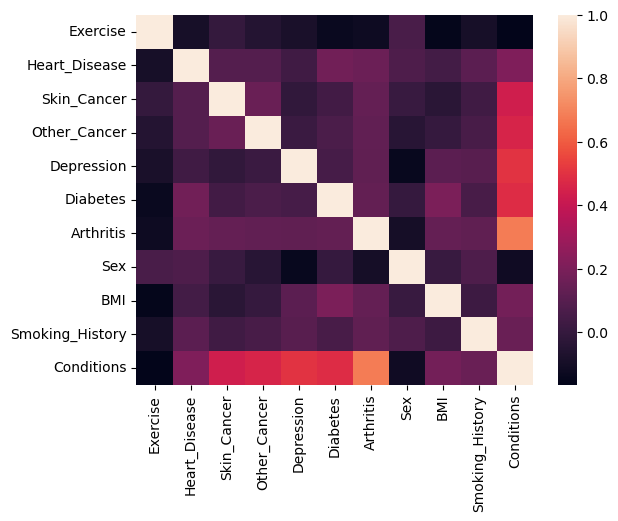

In [64]:
sns.heatmap(df.corr())

In [65]:
clean_df = pd.concat([df[categorical_], df[float_], df[integer_], df[boolean_]],axis=1) 

In [66]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308682 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   General_Health             308682 non-null  object  
 1   Checkup                    308682 non-null  object  
 2   Age_Group                  308682 non-null  object  
 3   Fruit_Category             308682 non-null  category
 4   Alcohol_Category           308682 non-null  category
 5   Green_Vegetables_Category  308682 non-null  category
 6   FriedPotato_Category       308682 non-null  category
 7   BMI                        308682 non-null  float64 
 8   Conditions                 308682 non-null  int64   
 9   Skin_Cancer                308682 non-null  bool    
 10  Depression                 308682 non-null  bool    
 11  Arthritis                  308682 non-null  bool    
 12  Sex                        308682 non-null  bool    
 13  Heart_Disease 

In [67]:
boolean_.remove('Heart_Disease')

In [68]:
target = clean_df['Heart_Disease']
features = clean_df.drop(['Heart_Disease'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, 
                                                    test_size=0.2, random_state=13, shuffle=True)

In [69]:
categorical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))
integer_pipeline = make_pipeline(FunctionTransformer(log1p), StandardScaler())
float_pipeline = make_pipeline(FunctionTransformer(log), StandardScaler())
boolean_pipeline = make_pipeline(PCA(n_components=3))

In [70]:
preprocessor = ColumnTransformer([('categorical', categorical_pipeline, categorical_),
                                  ('integer', integer_pipeline, integer_),
                                  ('float', float_pipeline, float_),
                                  ('boolean', boolean_pipeline, boolean_)
                                 ])

In [71]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['General_Health', 'Checkup', 'Age_Group',
                                  'Fruit_Category', 'Alcohol_Category',
                                  'Green_Vegetables_Category',
                                  'FriedPotato_Category']),
                                ('integer',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function log1p at 0x000001BAE0...
                                                  StandardScaler())]),
                                 ['Conditions']),
                                ('float',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function log at 0x000001BAE01AB1C0>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['BMI']),
                                ('boolean',
                                 Pipeline(steps=[('pca', PCA(n_components=3))]),
                                 ['Skin_Cancer', 'Depression', 'Arthritis',
                                  'Sex', 'Smoking_History', 'Exercise',
                                  'Diabetes', 'Other_Cancer'])])

In [ ]:
# models = {
#     'LogisticRegression':LogisticRegression(max_iter=10000,random_state=22),
#     'DecisionTree':DecisionTreeClassifier(random_state=22),
#     'RandomForest':RandomForestClassifier(n_estimators=100,random_state=22),
#     'K-NearestNeighbor':KNeighborsClassifier(),
#     'GaussianNB':GaussianNB(),
# }

scores_dict = {}

report_dict = {}

In [ ]:
log_r_estimator = make_pipeline(preprocessor, LogisticRegression(max_iter=10000))
log_r_estimator.fit(X_train, y_train)
log_r_estimator.score(X_test, y_test)

In [ ]:
log_r_estimator

In [ ]:
predictions = log_r_estimator.predict(X_test)
pd.DataFrame(predictions)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_categorical.columns
# df_categorical = df_categorical.sort_values(['Age_Category']).reset_index(drop=True)
# df_categorical.Age_Category.unique()
# sns.histplot(data=df_categorical, x='Age_Category', hue='General_Health', stat='count',multiple='dodge')
# plt.xticks(rotation=45)
# sns.histplot(data=df_categorical, x='Age_Category', hue='Checkup', stat='count',multiple='fill')
# plt.xticks(rotation=45)
# sns.histplot(data=df_categorical, x='General_Health', hue='Checkup', stat='count',multiple='fill')
# plt.xticks(rotation=45)
# df_numerical.hist()
# df_categorical.head()
# sns.histplot(df_numerical['Height_(cm)'])
# disease trend with age group
# Disease trend with excersise
# 
# df_categorical=pd.get_dummies(df_categorical, dtype=int)

# beginner_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
# beginner_pipeline.fit(X_train, y_train)
# beginner_pipeline.score(X_test, y_test)
# predictions = beginner_pipeline.predict(X_test)
# print(predictions)

# import warnings
# warnings.filterwarnings('ignore')

# g = sns.FacetGrid(categorical_, row='Age_Category', col='Checkup', sharex=False, sharey=False, hue='Heart_Disease')
# g.map_dataframe(sns.catplot, x='General_Health', kind='count')
# g.set_axis_labels = ('count', 'General_Health')
# g.set_titles(row_template = 'Age: {row_name}', col_template = 'Checkup: {col_name}')
# g.add_legend()


# def categorical(x):
#     return list(df.select_dtypes(include=['object']).columns)

# def boolean(x):
#     return list(df.select_dtypes(include=['bool']).columns)

# def integer(x):
#     return list(df.select_dtypes(include=['int64']).columns)

# def floats(x):
#     return list(df.select_dtypes(include=['float64']).columns)

# def invalid(x):
#     raise Exception(f"{x} is an Invalid datatype")

# def type_splitter(type_):
#     ##TODO Add more types
#     splits = {
#         'object':categorical,
#         'bool':boolean,
#         'int64':integer,
#         'float64':floats
#     }
#     splitter_function = splits.get(type_, invalid)
#     return splitter_function(type_)

# data_types = list(X_train.dtypes.astype(str).unique())
# cols= {}
# for type_ in data_types:
#     print(type_)
#     cols.update({f'{type_}': list(X_train.select_dtypes(include=[type_]).columns)})

In [116]:
# !pip install pyttsx3

Defaulting to user installation because normal site-packages is not writeable


In [121]:
# import pyttsx3

# engine = pyttsx3.init()
# engine.say("I will speak this text")

In [122]:
# print(type(engine))

<class 'pyttsx3.engine.Engine'>
